In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.8
scanpy      1.8.2
sinfo       0.3.4
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.1
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask  

In [3]:
adata = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

  0%|          | 0.00/7.86M [00:00<?, ?B/s]

  0%|          | 0.00/29.3M [00:00<?, ?B/s]

reading /Users/sadeq/Desktop/scanpy-practice/data/V1_Human_Lymph_Node/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
adata

AnnData object with n_obs × n_vars = 4035 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

/Users/sadeq/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sadeq/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sadeq/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

<AxesSubplot:xlabel='n_genes_by_counts'>

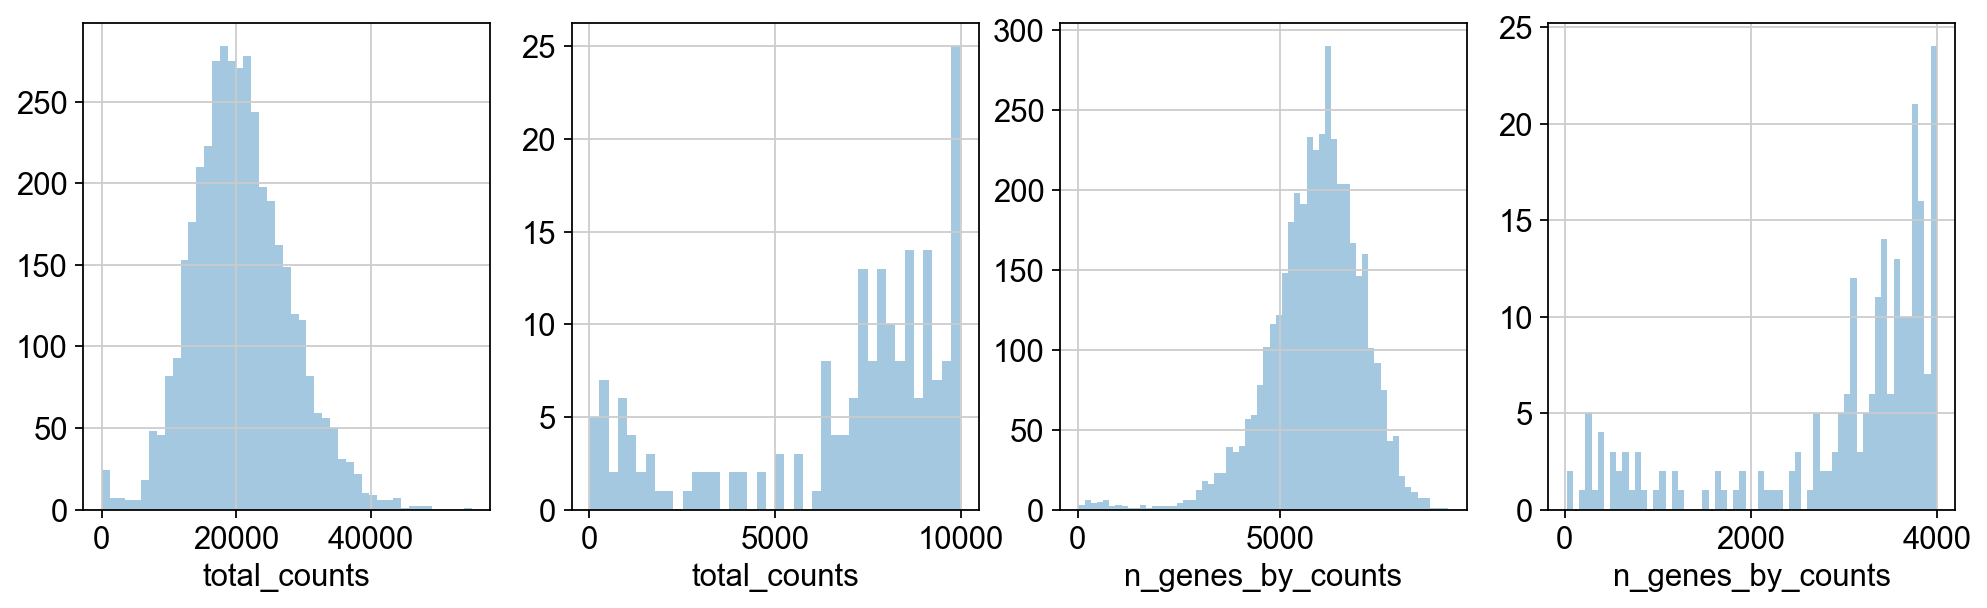

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [6]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20]
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)

filtered out 44 cells that have less than 5000 counts
filtered out 130 cells that have more than 35000 counts
#cells after MT filter: 3861
filtered out 16916 genes that are detected in less than 10 cells


Trying to set attribute `.var` of view, copying.


In [7]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [8]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
running Leiden clustering
    finished: found 10 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


... storing 'feature_types' as categorical
... storing 'genome' as categorical


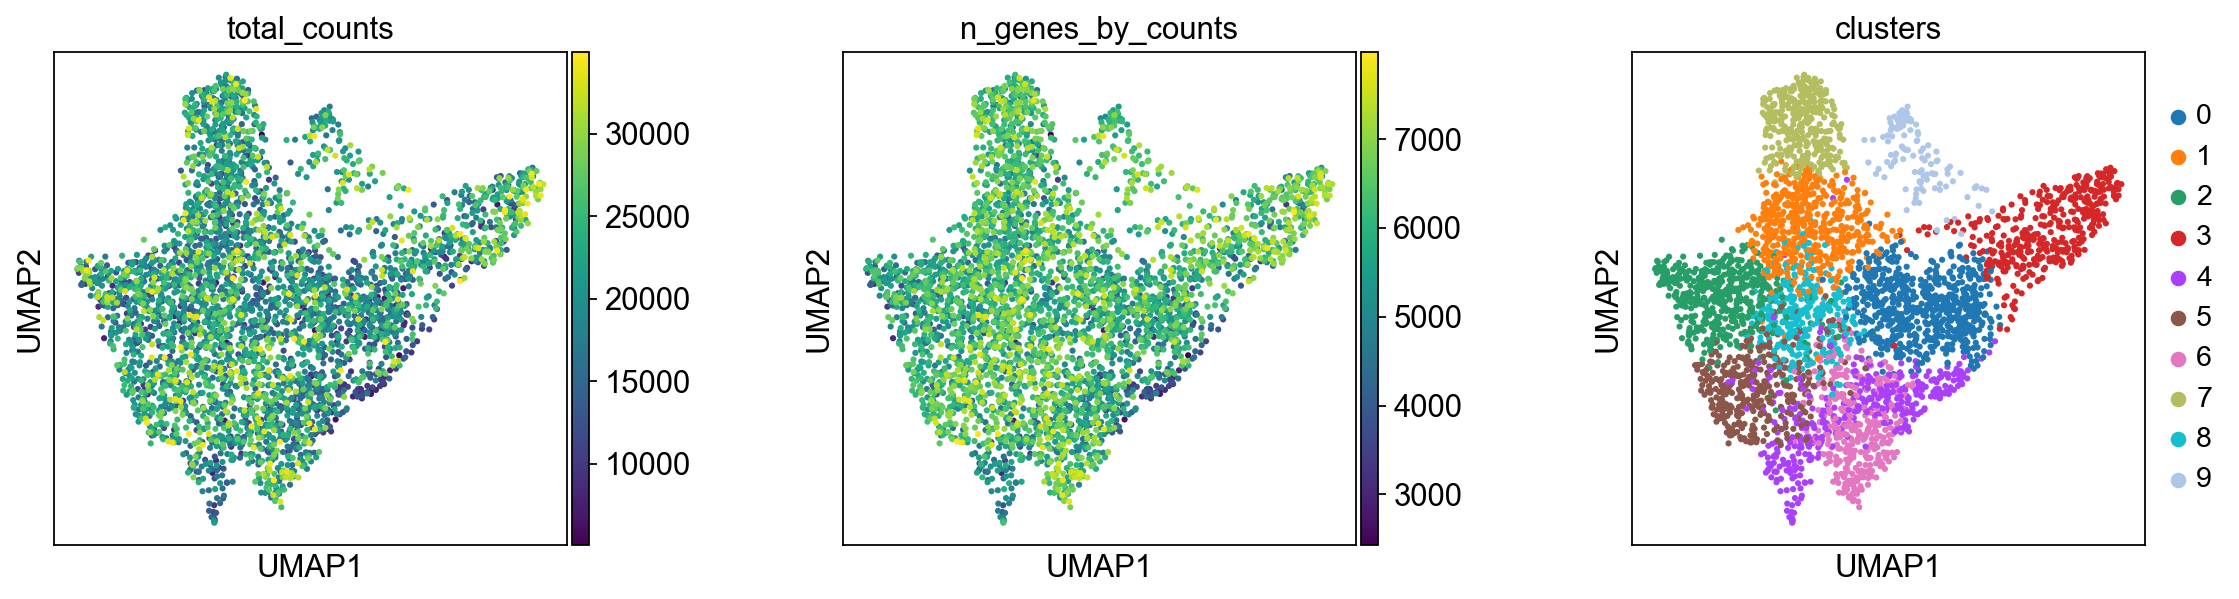

In [9]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

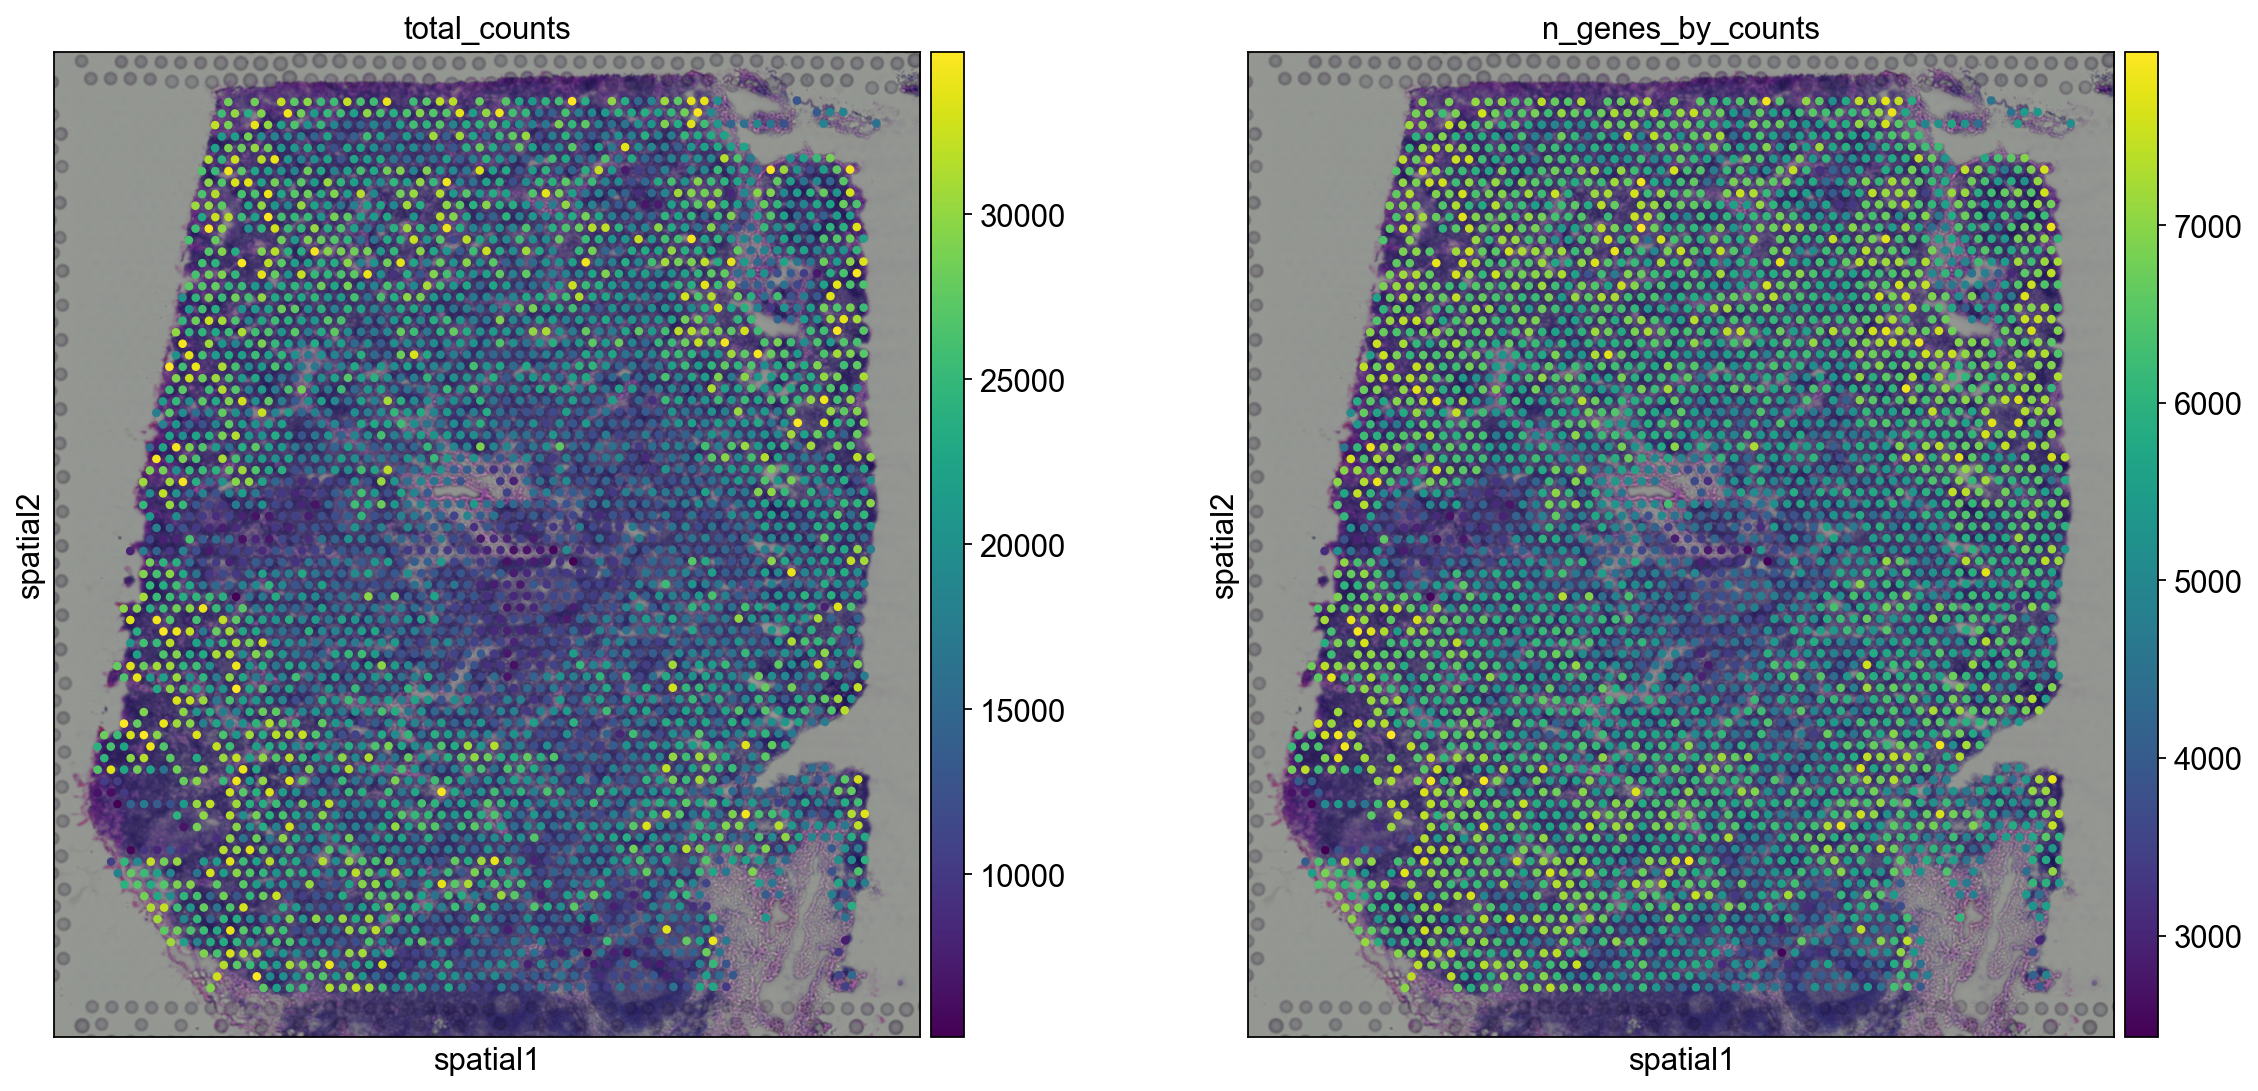

In [10]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

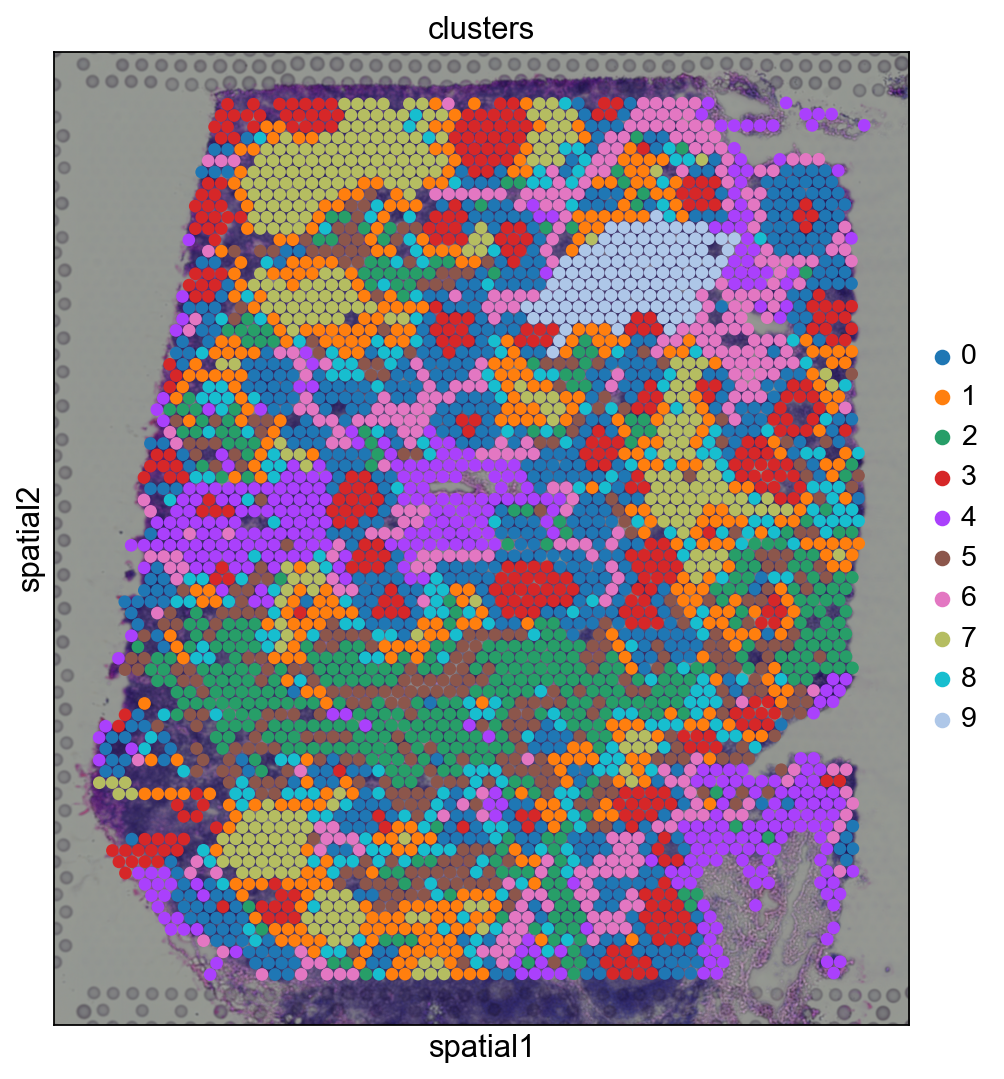

In [11]:
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)


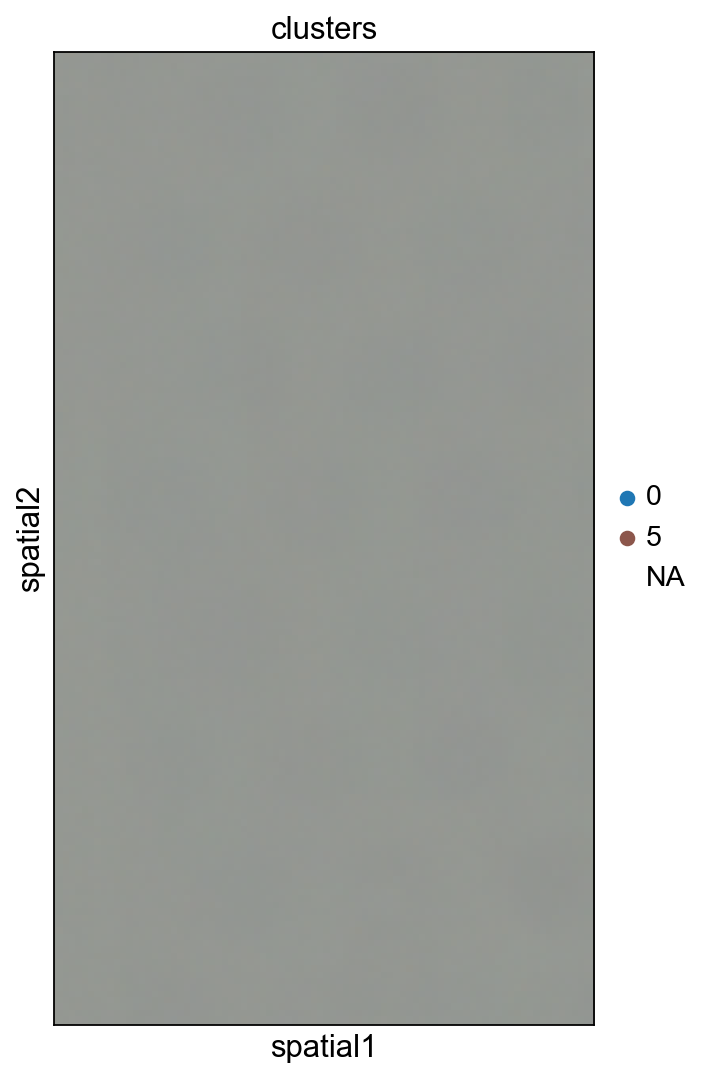

In [13]:
sc.pl.spatial(adata, img_key="hires", color="clusters", groups=["0", "5"], crop_coord=[1200, 1700, 1900, 1000], alpha=0.5, size=1.3)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_clusters']`
categories: 0, 1, 2, etc.
var_group_labels: 5


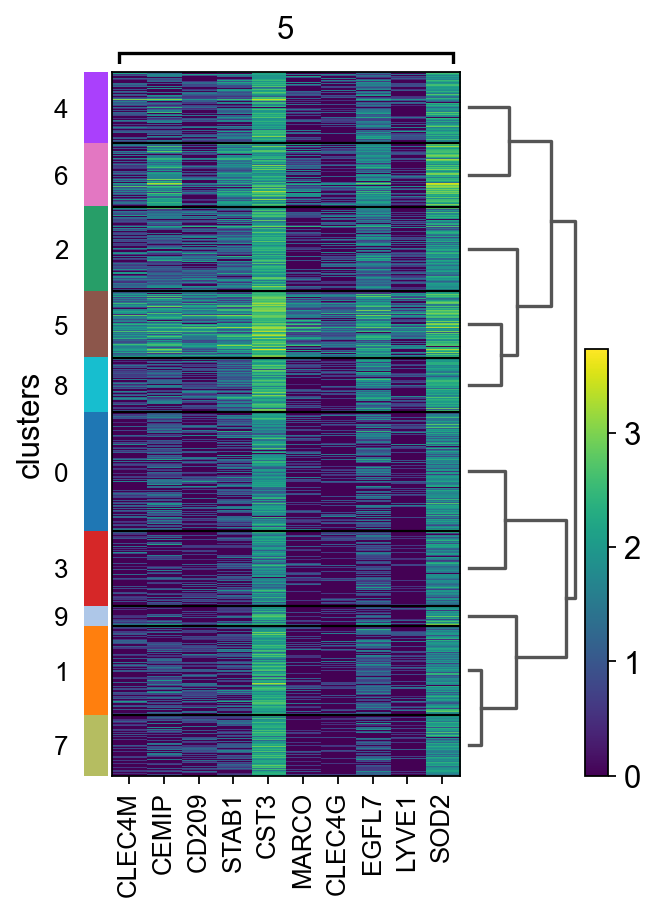

In [14]:
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, groups="5", n_genes=10, groupby="clusters")

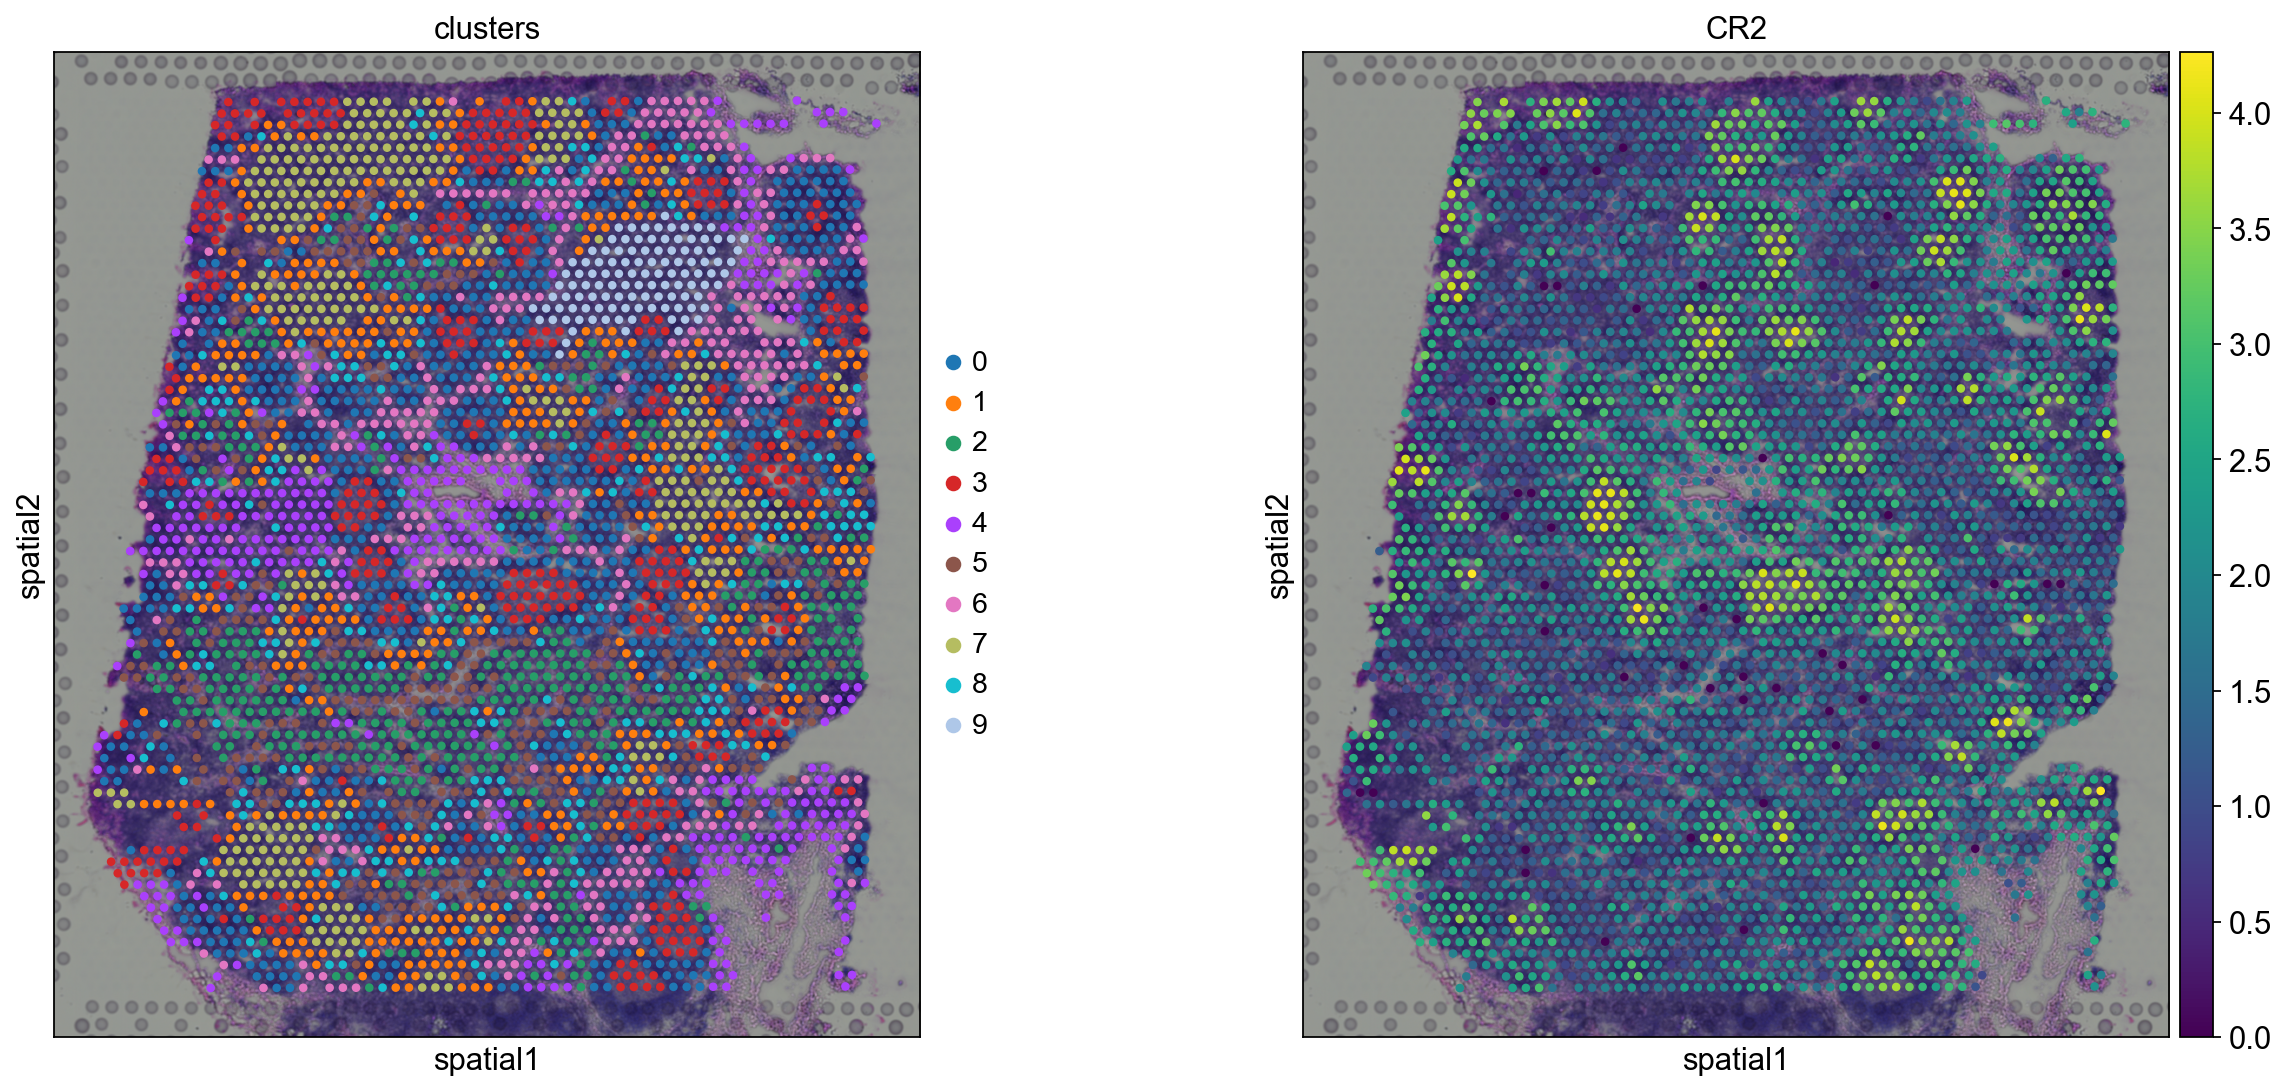

In [15]:
sc.pl.spatial(adata, img_key="hires", color=["clusters", "CR2"])


In [16]:
pip install spatialde

  Preparing metadata (setup.py) ... done
  Created wheel for NaiveDE: filename=NaiveDE-1.2.0-py3-none-any.whl size=5712 sha256=70d6746329b680ca7aea8f03e0a0996b93cc84229435e959d966d910438ef349
  Stored in directory: /Users/sadeq/Library/Caches/pip/wheels/01/34/53/eff6dafc79c8f34e98fce9705fbcbc458461172e53adb65d16
Successfully built NaiveDE
Note: you may need to restart the kernel to use updated packages.


In [17]:
import SpatialDE

In [22]:
%%time
counts = pd.DataFrame(adata.X.todense(), columns=adata.var_names, index=adata.obs_names)
coord = pd.DataFrame(adata.obsm['spatial'], columns=['x_coord', 'y_coord'], index=adata.obs_names)
results = SpatialDE.run(coord, counts)

/Users/sadeq/opt/anaconda3/lib/python3.8/site-packages/SpatialDE/base.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R2 = -2. * np.dot(X, X.T) + (Xsq[:, None] + Xsq[None, :])
Performing DE test
Pre-calculating USU^T = K's ...
/Users/sadeq/opt/anaconda3/lib/python3.8/site-packages/SpatialDE/base.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R2 = -2. * np.dot(X, X.T) + (Xsq[:, None] + Xsq[None, :])
Done: 8.5e+01s
Fitting gene models


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/19685 [00:00<?, ?it/s]

/Users/sadeq/opt/anaconda3/lib/python3.8/site-packages/SpatialDE/base.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  s2_logdelta = 1. / (derivative(LL_obj, np.log(max_delta), n=2) ** 2)


  0%|          | 0/19685 [00:00<?, ?it/s]

  0%|          | 0/19685 [00:00<?, ?it/s]

  0%|          | 0/19685 [00:00<?, ?it/s]

  0%|          | 0/19685 [00:00<?, ?it/s]

  0%|          | 0/19685 [00:00<?, ?it/s]

  0%|          | 0/19685 [00:00<?, ?it/s]

  0%|          | 0/19685 [00:00<?, ?it/s]

  0%|          | 0/19685 [00:00<?, ?it/s]

  0%|          | 0/19685 [00:00<?, ?it/s]

Finished fitting 10 models to 19685 genes


CPU times: user 1h 25min 53s, sys: 1h 20min 20s, total: 2h 46min 13s
Wall time: 26min 17s


In [23]:
results.index = results["g"]
adata.var = pd.concat([adata.var, results.loc[adata.var.index.values, :]], axis=1)

In [24]:
results.sort_values("qval").head(10)


FSV  M        g           l  max_delta       max_ll  max_mu_hat  \
g                                                                               
PSAP     0.230319  4     PSAP  130.547421   3.337378 -1211.343260    2.836226   
TAP1     0.077561  4     TAP1  474.158722  11.664898 -2737.079295    1.532544   
H3F3A    0.310712  4    H3F3A  248.797504   2.206578 -1162.340171    2.630205   
HLA-DOA  0.132948  4  HLA-DOA  474.158722   6.396626 -3123.614785    1.156078   
KIFC1    0.125703  4    KIFC1  474.158722   6.821834 -1637.910478    0.231014   
HMGA1    0.112582  4    HMGA1  474.158722   7.731203 -2810.674627    1.723289   
SNRNP70  0.073042  4  SNRNP70  474.158722  12.447373 -2012.710981    1.975769   
RPS10    0.218426  4    RPS10  474.158722   3.509577   113.916596    3.279090   
G0S2     0.195217  4     G0S2  248.797504   4.100514 -2590.387967    0.384888   
NOP53    0.115047  4    NOP53  474.158722   7.544533 -1435.793951    2.380082   

         max_s2_t_hat model     n    s2_FSV  s2_logdelta      time  \
g                                                                    
PSAP         0.885015    SE  3861  0.000005     0.000179  0.006531   
TAP1         0.048635    SE  3861  0.000009     0.001398  0.011226   
H3F3A        0.345112    SE  3861  0.000004     0.000087  0.004856   
HLA-DOA      0.061217    SE  3861  0.000020     0.001346  0.003798   
KIFC1        0.019605    SE  3861  0.000020     0.001528  0.003878   
HMGA1        0.069400    SE  3861  0.000013     0.001199  0.004061   
SNRNP70      0.060118    SE  3861  0.000007     0.001355  0.011471   
RPS10        0.165860    SE  3861  0.000014     0.000496  0.005168   
G0S2         0.053873    SE  3861  0.000005     0.000199  0.005226   
NOP53        0.089414    SE  3861  0.000014     0.001192  0.004316   

                 BIC  max_ll_null         LLR  pval  qval  
g                                                          
PSAP     2455.721246 -1304.143361   92.800101   0.0   0.0  
TAP1     5507.193315 -2821.510312   84.431018   0.0   0.0  
H3F3A    2357.715069 -1542.213160  379.872989   0.0   0.0  
HLA-DOA  6280.264296 -3221.758122   98.143337   0.0   0.0  
KIFC1    3308.855683 -1720.347004   82.436525   0.0   0.0  
HMGA1    5654.383981 -2920.544778  109.870151   0.0   0.0  
SNRNP70  4058.456688 -2098.882670   86.171690   0.0   0.0  
RPS10    -194.798465  -212.106934  326.023529   0.0   0.0  
G0S2     5213.810660 -2754.842268  164.454301   0.0   0.0  
NOP53    2904.622629 -1551.423390  115.629439   0.0   0.0